# Regresión: Advance Techniques in Python


### Regresión y visualización del dataset Cheddar de Faraway. 

En este notebook explicamos un workflow típico para analizar algún dataset y utilizamos diversas ténicas de regresión.

Debido a que las diversas técnicas utilizadas se encuentran fuera del alcance de nuestro curso de Modelos Estádisticos, no serán explicadas. Sin embargo, incluimos links y recursos para poder entender los diversos modelos, técnicas y pasos.

## Workflow stages

El workflow que debemos seguir dado un dataset debe seguir los siguientes pasos descritos en el libro [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312):

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data, outliers.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

Aunque según el libro, hay varias etapas que pueden quebrantar los anteriores principios como son los siguientes:

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


## Question and problem definition

A veces los problemas son propuestos y están definidos previamente. Sin embargo, hay ocasiones en las que no hay un verdadero propósito y debemos obtener conclusiones de los datos presentes. Por ejemplo nosotros podemos preguntarnos en base a nuestro dataset las siguientes preguntas

> ¿Existe correlacion entre algunas de las variables?, ¿Existen outliers en los datos aportados?, etc.

Nuestro dataset contiene los siguientes campos:

- **Taste:** una valoración subjetiva de los jueces.   
- **Acetic:** la concentración de ácido acético en un queso de terminado en esca
la logarítmica  
- **H2S:** la concentración de sulfito de hidrógeno en escala logarítmica.
- **Lactic:** Concentración de ácido láctico


## Workflow goals

La mayoría de las soluciones propuestas en el entorno de científico de datos pertence en una o varias de las siguientes cateogorías descrita en el libro antes mencionado:

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(123)

## Acquire data

La librería de Pandas de Python permite manipular los datos de manera similar a los DataFrame de R. Empezamos leyendo los datos proporcionados por el paquete *Faraway* y los dividimos en dos partes (train y test) con una proporción de 80% de train y utilizamos una semilla para obtener siempre los mismos resultados.

In [3]:
combine = pd.read_csv('cheddar.csv')

# Divide into train and test
train_df ,test_df = train_test_split(combine, test_size=0.2)

## Analyze by describing data

Pandas nos ayuda a describir los datasets y resolver preguntas frecuentes acerca de las variables y datos en fases iniciales del proyecto.

**¿Qué features continene nuestro dataset?**

Observamos directamente los nombres de nuestras features para poder manipular y analizarlas. El dataframe cheddar consiste de 30 muestras de queso cheddar en las que se ha medido el sabor (Taste) y las concentraciones de ácido acético (Acetic), ácido sulfhídrico (H2S) y lactosa (Lactose).


In [4]:
print(train_df.columns.values)

['taste' 'Acetic' 'H2S' 'Lactic']


**¿Qué categorias son cualitativas?**

Estos valores clasifican nuestras observaciones/muestras de nuestro dataset de similar features. Entre las categorias cualitativas se encuntran: valores nominales, ordinales, ratios, intervalos, etc. Esta división nos ayuda a la visualización de gráficas. Algunos ejemplos son:

- Categorical: Married, Sex, and Embarked. Ordinal: Position.

**¿Cuáles son cuantitativas?**

Las features que son numericas son valores númericos. Entre las cuales se encuentran valores discretos, continuos, temporales, etc. Algunos ejemplos son:

- Continous: Age, Fare. Discrete: Year.

In [5]:
# preview the data
train_df.head()

,taste,Acetic,H2S,Lactic
12,0.7,4.477,2.996,1.06
21,15.2,5.298,5.220,1.33
11,57.2,6.446,7.908,1.90
23,56.7,5.855,10.199,2.01
18,18.0,5.247,6.174,1.63


**¿Qué features contienen valores null?**

Estos valores serán corregidos o eliminados.

- Si son pocos datos, podrán ser eliminados.
- Si son muchos podríamos intentar predecirlos utilzando algún modelo.

**¿Cuáles son los tipos de datos para cada feature?**

Entre los cuales se pueden encontrar double, float, integer, boolean, strings, etc.

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 12 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   taste   24 non-null     float64
 1   Acetic  24 non-null     float64
 2   H2S     24 non-null     float64
 3   Lactic  24 non-null     float64
dtypes: float64(4)
memory usage: 960.0 bytes
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 7 to 27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   taste   6 non-null      float64
 1   Acetic  6 non-null      float64
 2   H2S     6 non-null      float64
 3   Lactic  6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


**¿Cúal es la distribución numérica de los valores a lo largo de las observaciones?**

Esto nos ayudará a entender el dataset y tener una visión global de nuestros datos y del dominio de nuestro problema.

- Hay un total de 32 observaciones.
- Todas las categorías son númericas continuas.
- La puntuación media es de 26.55 y la más alta es 57.2
- La mayoría de las valoraciones (> 75%) no pasan el aprobado.

In [7]:
train_df.describe() # Dataset description

,taste,Acetic,H2S,Lactic
count,24.000000,24.000000,24.000000,24.000000
mean,26.558333,5.429417,5.965625,1.453333
std,16.914257,0.559195,2.220955,0.313170
min,0.700000,4.477000,2.996000,0.860000
25%,13.850000,5.216750,4.108500,1.257500
50%,20.950000,5.389000,5.329000,1.475000
75%,38.925000,5.815250,7.599000,1.642500
max,57.200000,6.446000,10.199000,2.010000


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [8]:
X_train = train_df.drop("taste", axis=1)
Y_train = train_df["taste"]
X_test  = test_df.drop("taste", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((24, 3), (24,), (6, 3))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [9]:
# Linear Model
from sklearn import linear_model
logreg = linear_model.LinearRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

73.16

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Taste and H2S has the greatest correlation.
- Inversely, taste and Acetic has the lowest correlation.

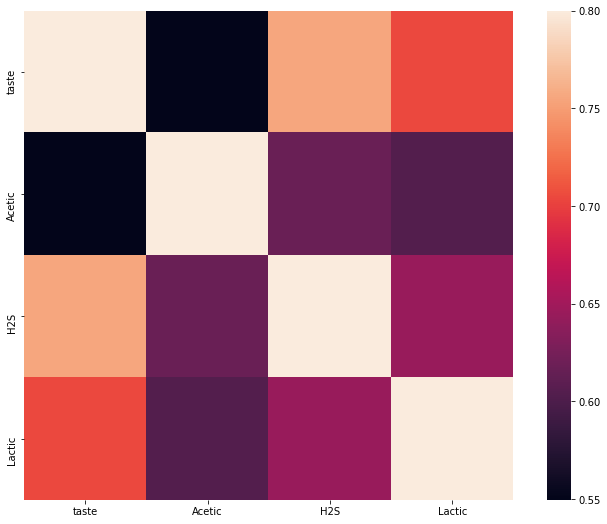

In [10]:
corrmat = combine.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Although it is also used for regression using a soft output instead. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [11]:
# Support Vector Machines
from sklearn.svm import SVR
svc = SVR()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

30.95

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

70.31

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [13]:
# Perceptron
from sklearn.neural_network import MLPRegressor
perceptron = MLPRegressor()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


46.84

In [14]:
# Linear SVC
from sklearn.svm import LinearSVR
linear_svc = LinearSVR()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

56.28

In [15]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

56.6

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [17]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.95

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [18]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,100.00
3,Random Forest,92.95
2,Logistic Regression,73.16
1,KNN,70.31
5,Stochastic Gradient Decent,56.60
6,Linear SVC,56.28
4,Perceptron,46.84
0,Support Vector Machines,30.95


## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)